In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import time

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn import metrics

In [117]:
start = time.time()
diabets = pd.read_csv('datasets/pima-indians-diabetes.csv' )
print(time.time() - start)
diabets.dtypes

0.00377798080444


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## EDA - Exploratory Data Analysis
In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In [118]:
diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
diabets.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [120]:
diabets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [121]:
diabets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Correlation plot
as you can see, these data are not have a good correlation between them, but between **"Glucose"** , **"BMI"** and **"Age"** with **Outcome** that the most important column in this dataset, you can see some little correlation.

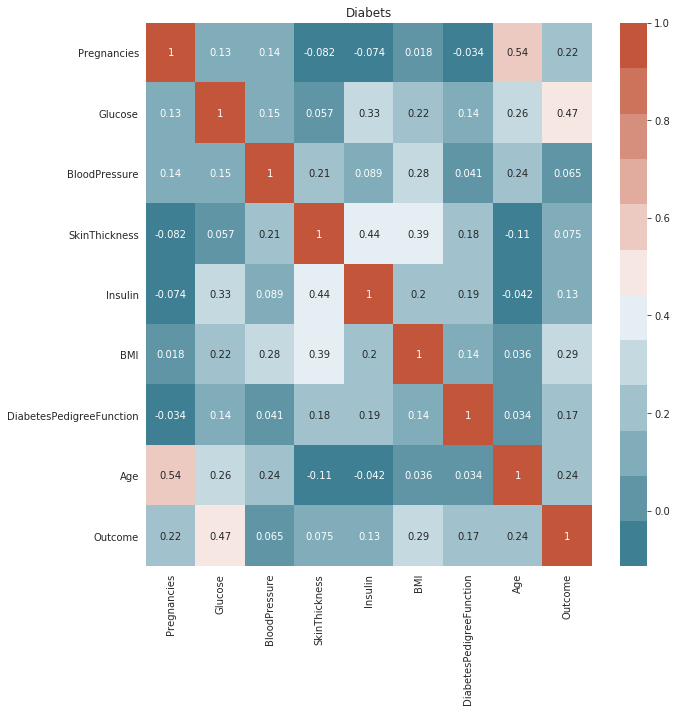

In [122]:
plt.figure(figsize=(10, 10))
df_corr = diabets.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Diabets")
plt.show()

## Normalizing Data 
Replacing 0 values with Mean of the Column

In [123]:
diabets['Glucose'] = diabets['Glucose'].replace(0 , np.mean(diabets['Glucose']))
diabets['BloodPressure'] = diabets['BloodPressure'].replace(0 , np.mean(diabets['BloodPressure']))
diabets['SkinThickness'] = diabets['SkinThickness'].replace(0 , np.mean(diabets['SkinThickness']))
diabets['Insulin'] = diabets['Insulin'].replace(0 , np.mean(diabets['Insulin']))
diabets['BMI'] = diabets['BMI'].replace(0 , np.mean(diabets['BMI']))
diabets['DiabetesPedigreeFunction'] = diabets['DiabetesPedigreeFunction'].replace(0 , np.mean(diabets['DiabetesPedigreeFunction']))
diabets['Age'] = diabets['Age'].replace(0 , np.mean(diabets['Age']))

In [124]:
diabets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [125]:
data = diabets.drop(['Outcome'], axis = 1 ).values
Outcome = diabets['Outcome'].values

## Preprocessing - Scaling Data 
Data preprocessing is an important step in the data mining process. The phrase "garbage in, garbage out" is particularly applicable to data mining and machine learning projects.

In [126]:
scalar = StandardScaler()
data = scalar.fit_transform(data)

## PCA decomposition - Principal Component Analysis
Given a collection of points in two, three, or higher dimensional space, a "best fitting" line can be defined as one that minimizes the average squared distance from a point to the line.

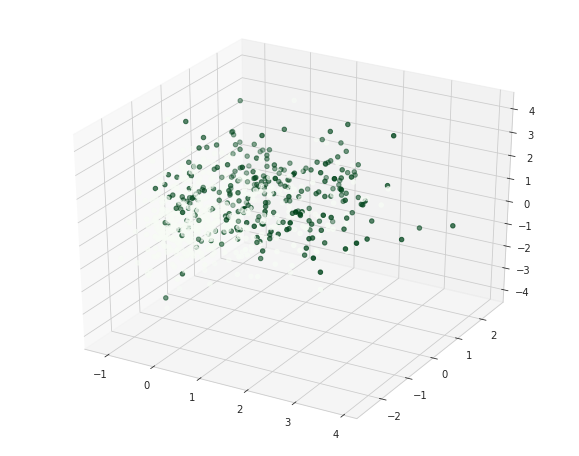

In [127]:
xs = data[:,0]
ys = data[:,1]
zs = data[:,2]
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(xs, ys, zs, c=Outcome, cmap='Greens')
plt.show()

In [128]:
print('as you can see here these data has {} dimention.'.format(data.shape))

as you can see here these data has (768, 8) dimention.


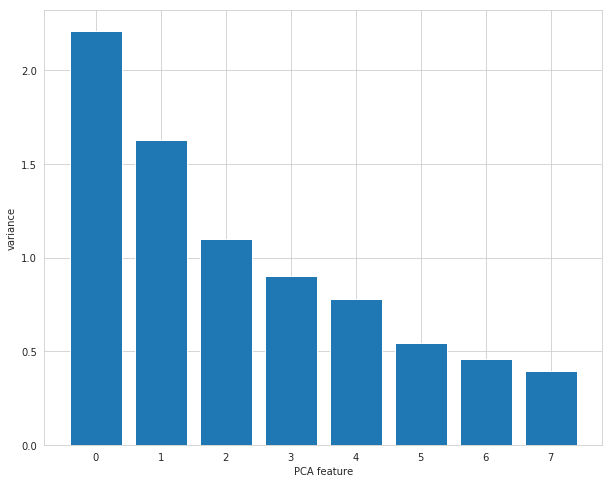

In [129]:
pca = PCA()

pca.fit(data)

# Plot the explained variances
features = range(pca.n_components_)
plt.figure(figsize=(10, 8))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [130]:
pca = PCA(n_components=3)

In [131]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [132]:
data = pca.transform(data)

In [133]:
print('After dimension reduction with PCA , these data shape reduced to {}.'.format(data.shape))

After dimension reduction with PCA , these data shape reduced to (768, 3).


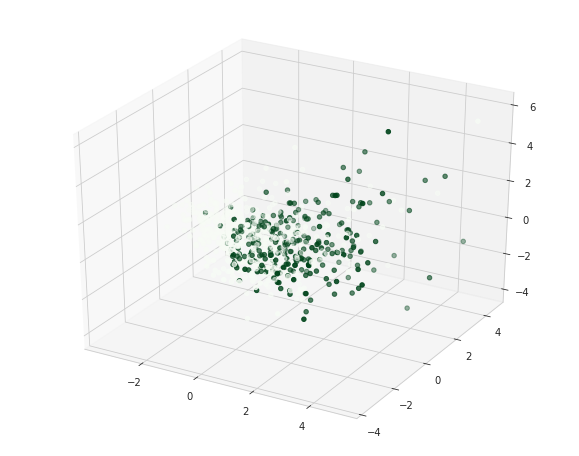

In [134]:
xs = data[:,0]
ys = data[:,1]
zs = data[:,2]
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(xs, ys, zs, c=Outcome, cmap='Greens')
plt.show()

## K-means
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

In [135]:
model = KMeans(n_clusters=2)

In [136]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [137]:
labels = model.predict(data)

In [138]:
diabets['Cluster'] = labels

## Categorical Visualize

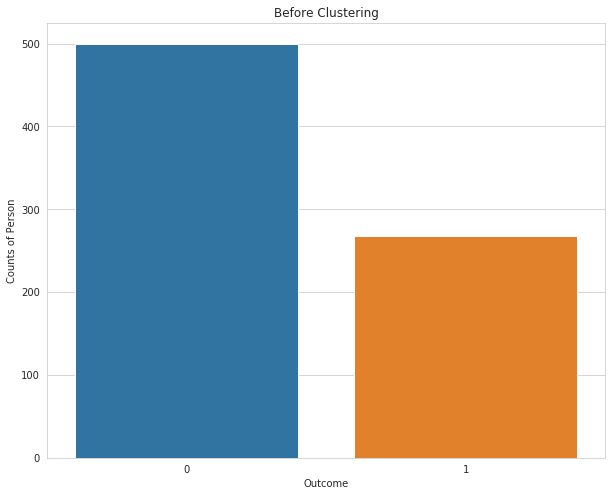

In [139]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'Outcome', data = diabets)
plt.xlabel('Outcome')
plt.ylabel('Counts of Person')
plt.title('Before Clustering')
plt.show()

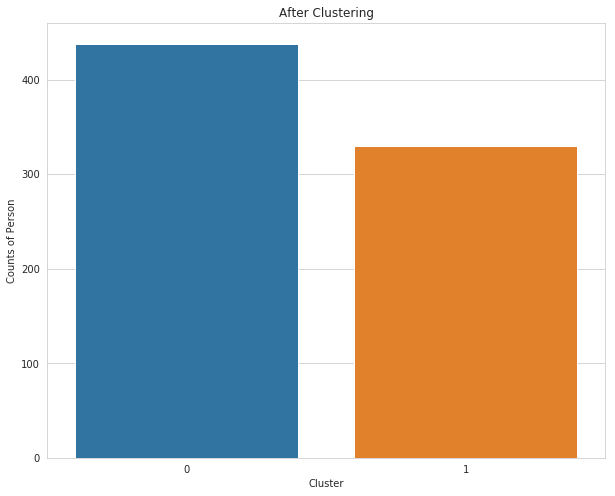

In [140]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'Cluster', data = diabets)
plt.xlabel('Cluster')
plt.ylabel('Counts of Person')
plt.title('After Clustering')
plt.show()

## Clustering Visualize - Age / Glucose

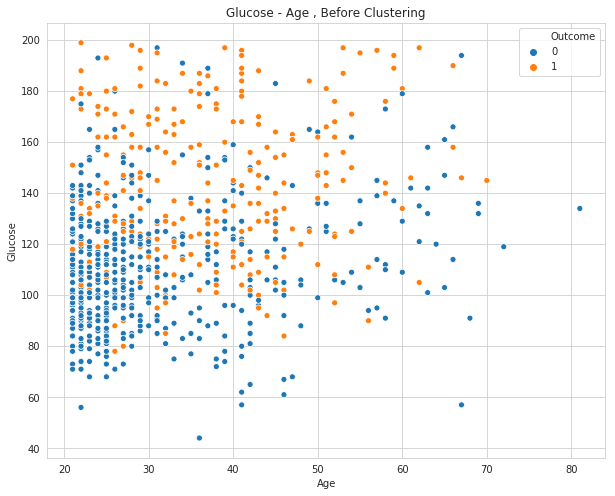

In [141]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x = 'Age' , y = 'Glucose' , data = diabets , hue = 'Outcome')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Glucose - Age , Before Clustering')
plt.show()

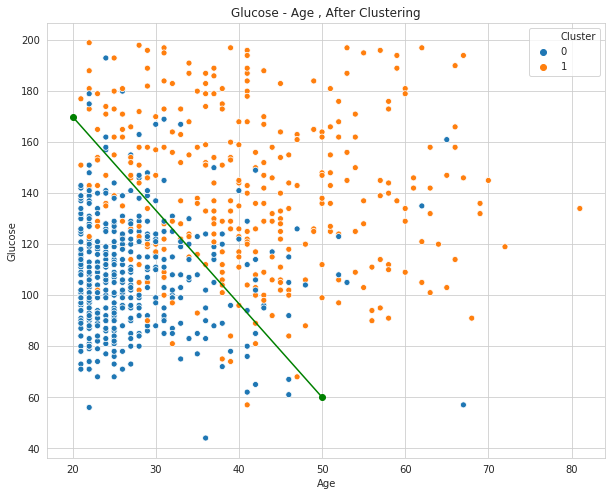

In [142]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x = 'Age' , y = 'Glucose' , data = diabets , hue = 'Cluster')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Glucose - Age , After Clustering')
x1, y1 = [20, 50], [170,60]
plt.plot(x1, y1, marker = 'o' , c = 'g')
plt.show()

## Clustering Visualize - Age / BMI

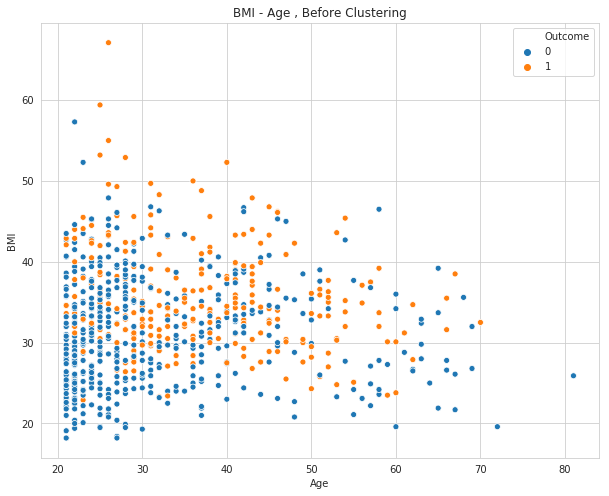

In [143]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x = 'Age' , y = 'BMI' , data = diabets , hue = 'Outcome')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI - Age , Before Clustering')
plt.show()

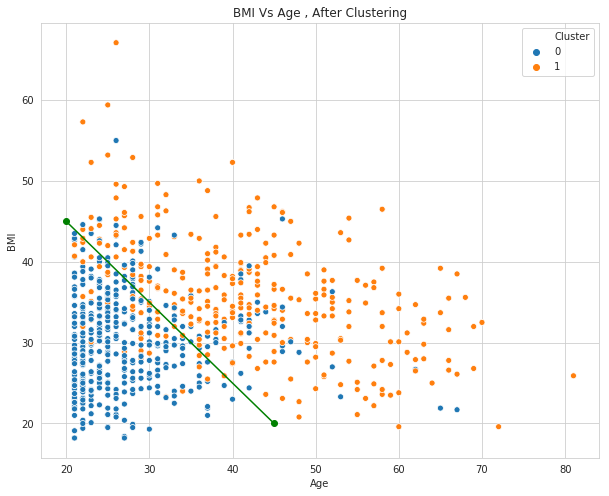

In [144]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x = 'Age' , y = 'BMI' , data = diabets , hue = 'Cluster')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI Vs Age , After Clustering')
x1, y1 = [20, 45], [45,20]
plt.plot(x1, y1, marker = 'o' , c = 'g')
plt.show()

## Removing Additional Data 

In [145]:
list_of_i = []
for i in range(len(diabets)):
    if diabets['Outcome'].iloc[i] != diabets['Cluster'].iloc[i]:
        list_of_i.append(i)

In [146]:
diabets.drop(index = list_of_i , inplace=True)

In [147]:
diabets.reset_index(inplace=True)
del diabets['index']

In [148]:
print('Remove {} % data, because the labels are not Equals - Cluster & Outcome '.format(len(list_of_i) * 100 / 768))

Remove 29 % data, because the labels are not Equals - Cluster & Outcome 


In [149]:
print('We run three classification algorithms on {:.2f} % of primary data'.format(( 768 - len(list_of_i) ) * 100 / 768))

We run three classification algorithms on 70.00 % of primary data


## Visulazing Data After Removing Additional Data - Age / BMI

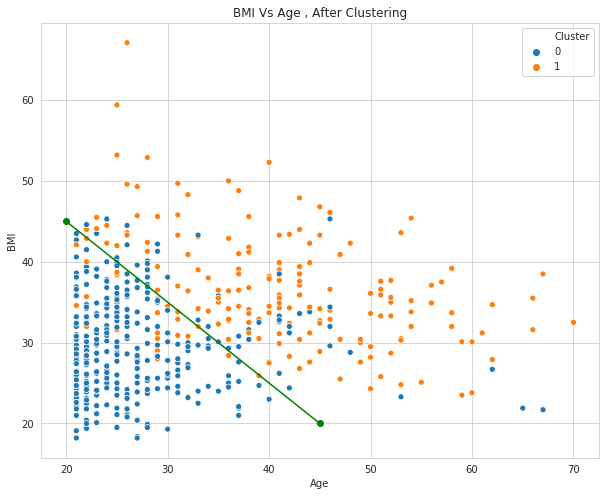

In [150]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x = 'Age' , y = 'BMI' , data = diabets , hue = 'Cluster')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('BMI Vs Age , After Clustering')
x1, y1 = [20, 45], [45,20]
plt.plot(x1, y1, marker = 'o' , c = 'g')
plt.show()

## Visulazing Data After Removing Additional Data - Age / Glucose

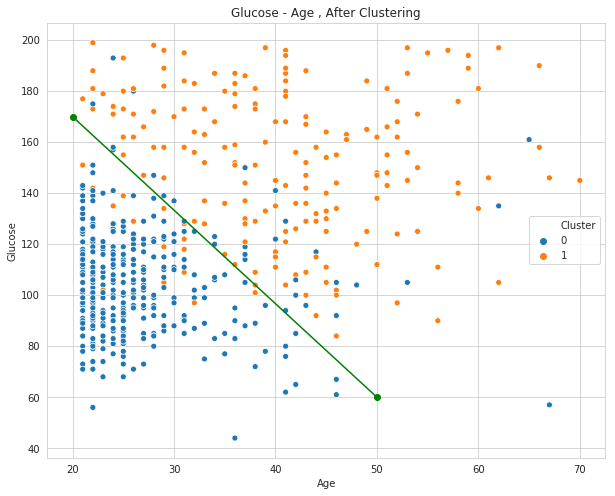

In [151]:
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x = 'Age' , y = 'Glucose' , data = diabets , hue = 'Cluster')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Glucose - Age , After Clustering')
x1, y1 = [20, 50], [170,60]
plt.plot(x1, y1, marker = 'o' , c = 'g')
plt.show()

## Spliting Data for Classification

In [152]:
X = diabets.drop(['Outcome' , 'Cluster'], axis = 1 ).values
y = diabets['Cluster'].values

In [153]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X , y  , test_size = 0.4 , random_state = 42)

## Defining Functions

In [155]:
def calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test):
    
    neighbors = np.arange(1, 20)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors= k)
        knn.fit(X_train , y_train)
        train_accuracy[i] = knn.score(X_train, y_train)    
        test_accuracy[i] = knn.score(X_test, y_test)

    plt.figure(figsize=(10, 8))
    sns.set_style("whitegrid")
    plt.title('k in kNN analysis')
    plt.plot( neighbors , test_accuracy , label = 'Testing Accuracy')
    plt.plot(neighbors,train_accuracy ,label = 'Training Accuracy')
    plt.legend()
    plt.annotate('Best accuracy for this model with k = {} is {:.2f} %'.format( np.argmax(test_accuracy)+1, max(test_accuracy) * 100), xy=(np.argmax(test_accuracy) + 1 , max(test_accuracy)), xytext=(7.5 , 0.99),
            arrowprops=dict(arrowstyle="fancy",facecolor='black',
                            connectionstyle="angle3,angleA=0,angleB=-90") , color='g')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')

    plt.show()

In [156]:
def kNN_algorithm(X_train , y_train , X_test , y_test , k):
    
    global y_pred_kNN
    global kNN_pipeline
    
    steps = [('kNN', KNeighborsClassifier(n_neighbors = k))]
    
    kNN_pipeline = Pipeline(steps)
    
    kNN_pipeline.fit(X_train , y_train)
    
    y_pred_kNN = kNN_pipeline.predict(X_test)
    
    print(classification_report(y_test , y_pred_kNN))
    print('kNN algorithm acuracy is : {0:.2f} %'.format(kNN_pipeline.score(X_test , y_test) * 100))

In [157]:
def plot_confusion_matrix(cf_matrix , y_test , model_type , cf_size):
    if cf_size == '2x2':
        group_names = ['True Negative','False Positive','False Negative','True Positive']
        group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
        labels = ['{}\n{}'.format(v1 ,v2) for v1, v2 in zip(group_names,group_counts)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cf_matrix,
            annot = labels,
            cmap=sns.cubehelix_palette(100, as_cmap=True, hue=1, dark=0.30),
            fmt='',
            linewidths=1.5,
            vmin=0,
            vmax=100,
        )
        plt.title(model_type)
        plt.show()
    else:
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cf_matrix / np.sum(cf_matrix) * 100,
            annot = True,
            cmap=sns.cubehelix_palette(100, as_cmap=True, hue=1, dark=0.30),
            fmt='.2f',
            linewidths=1.5,
            vmin=0,
            vmax=100,
        )
        plt.title(model_type)
        plt.show()

In [158]:
def plot_AUC_ROC_kNN(X_test , y_test , pipeline):
    
    probs = pipeline.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(10, 8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = {0:.2f}'.format(roc_auc_score(y_test, preds)))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('ROC AUC score is ' + '{0:.2f}'.format(roc_auc_score(y_test, preds)))

In [159]:
def SVM_algorithm(X_train, X_test, y_train, y_test):
    
    global y_pred_SVM
    global SVM_pipeline
    global y_prob_SVM
    
    steps = [('SVM', SVC(probability=True))]
    
    SVM_pipeline = Pipeline(steps)
    
    parameters = {'SVM__C':[1, 10, 100 ],
                  'SVM__gamma':[0.1, 0.01]}
    
    cv = GridSearchCV(SVM_pipeline , cv = 10 , param_grid = parameters)
    
    cv.fit(X_train , y_train)
    
    y_pred_SVM = cv.predict(X_test)
    
    y_prob_SVM = cv.predict_proba(X_test)
    
    print("Accuracy: {0:.2f} %".format(cv.score(X_test, y_test) * 100))
    print(classification_report(y_test, y_pred_SVM))
    print("Tuned Model Parameters: {}".format(cv.best_params_))

In [160]:
def plot_AUC_ROC_SVM_and_LG(X_test , y_test , y_prob_SVM):
    
    probs = y_prob_SVM
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure(figsize=(10, 8))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = {:.2f}'.format(roc_auc_score(y_test, preds)))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print('ROC AUC score is ' + '{:.2f}'.format(roc_auc_score(y_test, preds)))

In [161]:
def LogisticRegression_algorithm(X_train, X_test, y_train, y_test):
    
    global y_pred_LG
    global LG_pipeline
    global y_prob_LG
    
    steps = [ ('LogisticRegression', LogisticRegression(random_state = 0 , solver='liblinear'))]
    
    LG_pipeline = Pipeline(steps)

    
    LG_pipeline.fit(X_train , y_train)
    
    y_pred_LG = LG_pipeline.predict(X_test)
    
    y_prob_LG = LG_pipeline.predict_proba(X_test)
    
    print("Accuracy: {0:.2f} %".format(LG_pipeline.score(X_test, y_test) * 100))
    print(classification_report(y_test, y_pred_LG))

## k-Nearest Neighbors (kNN)

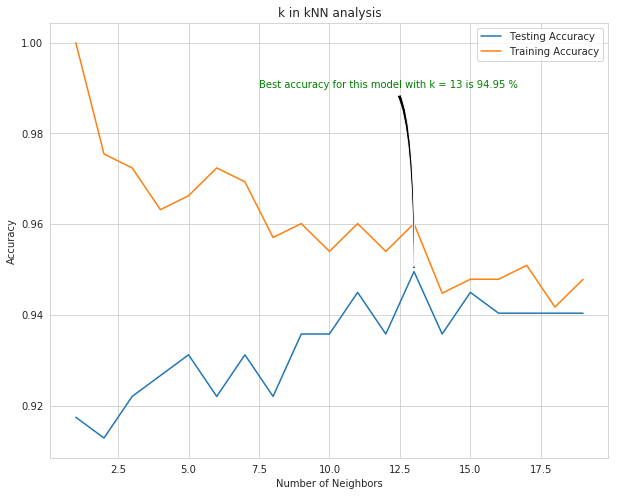

In [162]:
calculate_and_plot_k_neighbors(X_train, X_test, y_train, y_test)

In [163]:
kNN_algorithm(X_train , y_train , X_test , y_test , 13)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       141
           1       0.96      0.90      0.93        77

   micro avg       0.95      0.95      0.95       218
   macro avg       0.95      0.94      0.94       218
weighted avg       0.95      0.95      0.95       218

kNN algorithm acuracy is : 94.95 %


In [164]:
cf_matrix_knn = confusion_matrix(y_test, y_pred_kNN)

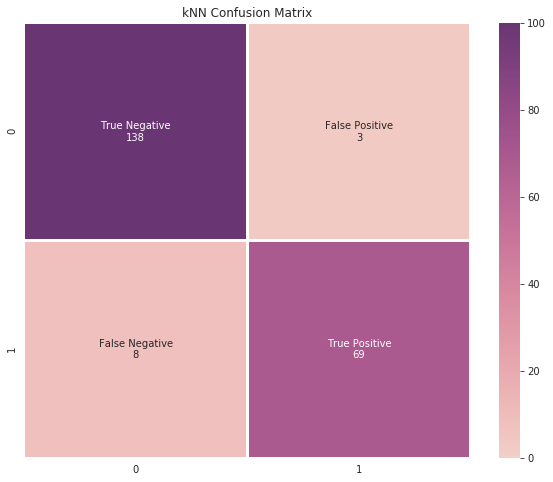

In [165]:
plot_confusion_matrix(cf_matrix_knn , y_test , 'kNN Confusion Matrix' , '2x2')

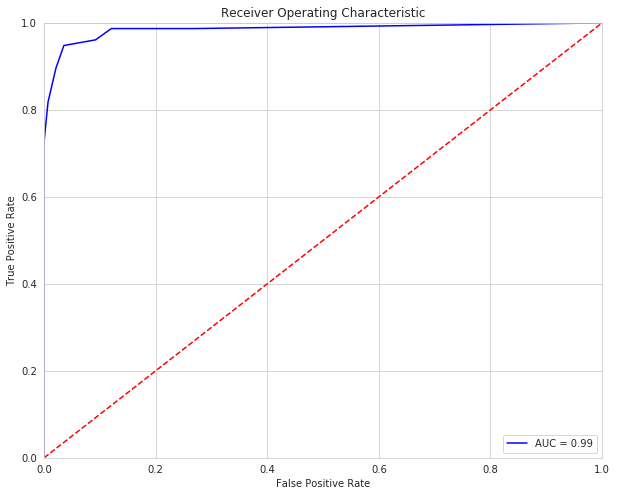

ROC AUC score is 0.99


In [166]:
plot_AUC_ROC_kNN(X_test , y_test , kNN_pipeline)

## Sub Vector Machine (SVM)

In [167]:
SVM_algorithm(X_train, X_test, y_train, y_test)

Accuracy: 94.95 %
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       141
           1       0.93      0.92      0.93        77

   micro avg       0.95      0.95      0.95       218
   macro avg       0.95      0.94      0.94       218
weighted avg       0.95      0.95      0.95       218

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1}


/home/mars/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [168]:
cf_matrix_svm = confusion_matrix(y_test, y_pred_SVM)

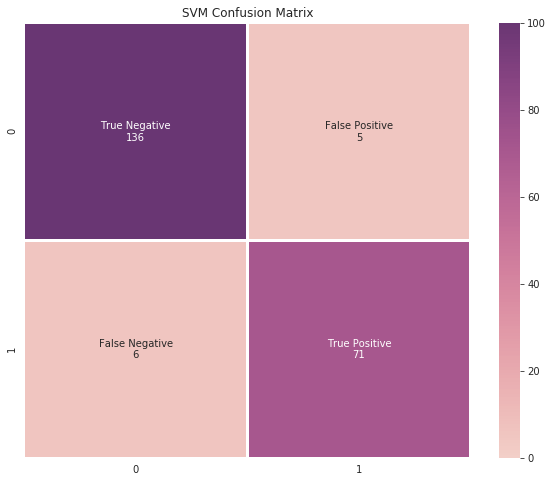

In [169]:
plot_confusion_matrix(cf_matrix_svm , y_test , 'SVM Confusion Matrix' , '2x2')

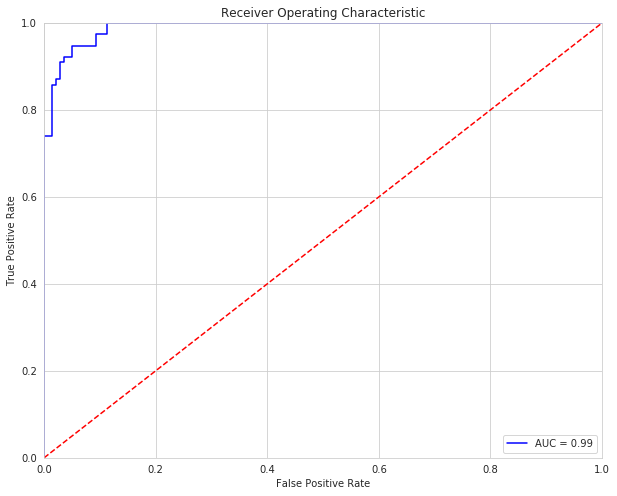

ROC AUC score is 0.99


In [170]:
plot_AUC_ROC_SVM_and_LG(X_test , y_test , y_prob_SVM)

## Logistic Regression

In [171]:
LogisticRegression_algorithm(X_train, X_test, y_train, y_test)

Accuracy: 98.62 %
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       141
           1       0.97      0.99      0.98        77

   micro avg       0.99      0.99      0.99       218
   macro avg       0.98      0.99      0.98       218
weighted avg       0.99      0.99      0.99       218



In [172]:
cf_matrix_LG = confusion_matrix(y_test, y_pred_LG)

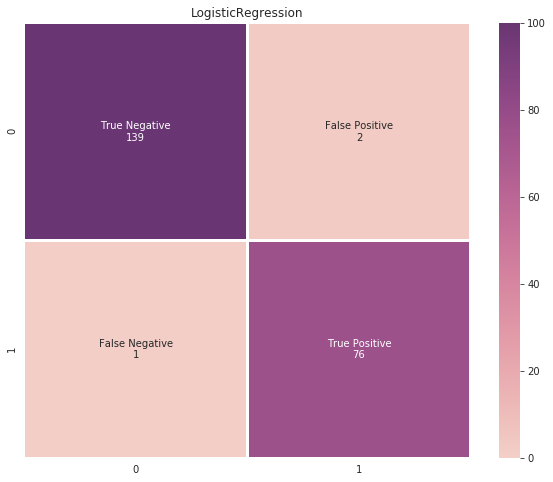

In [173]:
plot_confusion_matrix(cf_matrix_LG , y_test , 'LogisticRegression' , '2x2')

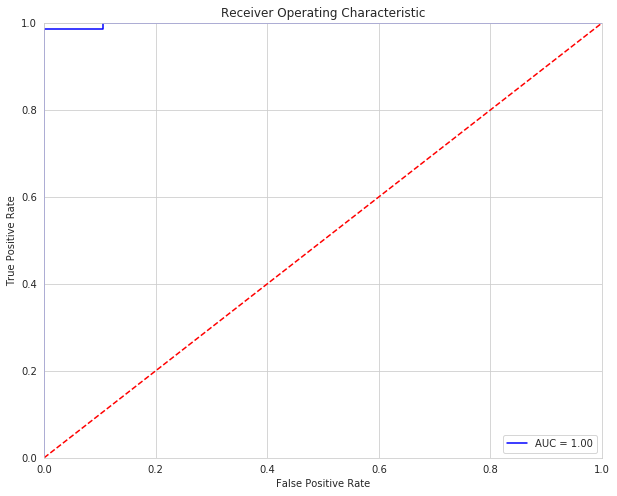

ROC AUC score is 1.00


In [174]:
plot_AUC_ROC_SVM_and_LG(X_test , y_test , y_prob_LG)